<a href="https://colab.research.google.com/github/afaafa/wrangling-and-visualization-project/blob/main/ebay_car_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# import library untuk ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Path data
path_data = "autos.csv"

# read data dari file
autos = pd.read_csv(path_data, encoding='latin-1')

# Menampilkan 5 data teratas
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# Eksploration of Data & Preprocessing

Outline:
* Check data type and match with definition given by data source
* Check missing value and handle it
* Check Duplicated and handle it
* Check Inkonsistensi Data and handle it
* Check outlier and handle it

## Check Data Type

In [3]:
# Cek tipe data dari data autos
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

1. Data berisi 20 kolom, dan ditemukan bahwa ada 13 kolom bertipe object, dan 7 kolom bertipe integer
2. Penamaan kolom menggunakan camelCase, hal tersebut tidak sesuai dengan aturan penamaan di Python
3. Ada beberapa kolom yang memiliki null value

kita akan mengubah nama kolom menjadi lebih mudah dibaca sehingga memudahkan dalam proses wrangling, nama kolom menggunkan format snake-case supaya lebih konsisten

In [4]:
#cek nama kolom
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
# mengubah nama kolom yang menggunakan camelCase menjadi snake-case
change_name_column = {'dateCrawled': 'date_crawled',
                      'offerType': 'offer_type',
                      'vehicleType': 'vehicle_type',
                      'yearOfRegistration': 'registration_year',
                      'powerPS': 'power_ps',
                      'monthOfRegistration': 'registration_month',
                      'fuelType': 'fuel_type',
                      'notRepairedDamage': 'unrepaired_damage',
                      'dateCreated': 'ad_created',
                      'nrOfPictures': 'nr_of_picture',
                      'postalCode': 'postal_code',
                      'lastSeen': 'last_seen',
                      }

autos = autos.rename(columns = change_name_column)
autos.head(2)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_picture,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


## Ekploration of Data
#### Melihat statistik deskriptif semua kolom

In [7]:
# melihat statistik deskiptif semua kolom
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_picture,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


1. kolom yang paling banyak memiliki NaN nilai:
- seller, offer_type, vehicle_type, brand

2. Kolom yang memiliki nilai kosong:
- nr_of_picture

3. kolom yang membutuhkan penyelidikan lebih lanjut:
- registration_year: memiliki nilai min dan max yang tidak realistis
- price : memiliki nilai min dan max harga yang tidak realistis


In [8]:
# info dataset
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        371528 non-null  object
 1   name                371528 non-null  object
 2   seller              371528 non-null  object
 3   offer_type          371528 non-null  object
 4   price               371528 non-null  int64 
 5   abtest              371528 non-null  object
 6   vehicle_type        333659 non-null  object
 7   registration_year   371528 non-null  int64 
 8   gearbox             351319 non-null  object
 9   power_ps            371528 non-null  int64 
 10  model               351044 non-null  object
 11  kilometer           371528 non-null  int64 
 12  registration_month  371528 non-null  int64 
 13  fuel_type           338142 non-null  object
 14  brand               371528 non-null  object
 15  unrepaired_damage   299468 non-null  object
 16  ad

kita drop dulu kolom nr_of_picture karena semua data bernilai 0 dan juga tidak dibutuhkan dalam proses analisis

In [9]:
# hapus kolom nr_of_picture
del autos['nr_of_picture']

mengubah tipe data dari date_crawled dari object menjadi datetime

In [10]:
# Convert kolom date_crawled
autos.date_crawled = pd.to_datetime(autos.date_crawled, yearfirst=True)

# Tampilkan data tanggal dan waktu setelah diconvert
autos.date_crawled

0        2016-03-24 11:52:17
1        2016-03-24 10:58:45
2        2016-03-14 12:52:21
3        2016-03-17 16:54:04
4        2016-03-31 17:25:20
                 ...        
371523   2016-03-14 17:48:27
371524   2016-03-05 19:56:21
371525   2016-03-19 18:57:12
371526   2016-03-20 19:41:08
371527   2016-03-07 19:39:19
Name: date_crawled, Length: 371528, dtype: datetime64[ns]

mengubah tipe data dari last_seen dari object menjadi datetime

In [11]:
# Convert kolom last_seen
autos.last_seen = pd.to_datetime(autos.last_seen, yearfirst=True)

# Tampilkan data tanggal dan waktu setelah diconvert
autos.last_seen

0        2016-04-07 03:16:57
1        2016-04-07 01:46:50
2        2016-04-05 12:47:46
3        2016-03-17 17:40:17
4        2016-04-06 10:17:21
                 ...        
371523   2016-04-06 00:46:52
371524   2016-03-11 18:17:12
371525   2016-04-07 07:15:26
371526   2016-03-24 12:45:21
371527   2016-03-22 03:17:10
Name: last_seen, Length: 371528, dtype: datetime64[ns]

mengubah tipe data dari ad_created dari object menjadi datetime

In [12]:
# Convert kolom ad_created
autos.ad_created = pd.to_datetime(autos.ad_created, yearfirst=True)

# Tampilkan data tanggal dan waktu setelah diconvert
autos.ad_created

0        2016-03-24
1        2016-03-24
2        2016-03-14
3        2016-03-17
4        2016-03-31
            ...    
371523   2016-03-14
371524   2016-03-05
371525   2016-03-19
371526   2016-03-20
371527   2016-03-07
Name: ad_created, Length: 371528, dtype: datetime64[ns]

In [13]:
# cek kembali tipe data tiap kolom
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        371528 non-null  datetime64[ns]
 1   name                371528 non-null  object        
 2   seller              371528 non-null  object        
 3   offer_type          371528 non-null  object        
 4   price               371528 non-null  int64         
 5   abtest              371528 non-null  object        
 6   vehicle_type        333659 non-null  object        
 7   registration_year   371528 non-null  int64         
 8   gearbox             351319 non-null  object        
 9   power_ps            371528 non-null  int64         
 10  model               351044 non-null  object        
 11  kilometer           371528 non-null  int64         
 12  registration_month  371528 non-null  int64         
 13  fuel_type           338142 no

## Cek Missing Value

In [14]:
# Mendapatkan jumlah missing value tiap kolom
# dan mengurutkan dari yang terbesar ke terkecil
missing = autos.isna().sum().sort_values(ascending = False)
# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_data = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(autos)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_data

,NaN_count,NaN_percentage
unrepaired_damage,72060,0.193956
vehicle_type,37869,0.101928
fuel_type,33386,0.089861
model,20484,0.055134
gearbox,20209,0.054394
name,0,0.000000
seller,0,0.000000
offer_type,0,0.000000
price,0,0.000000
abtest,0,0.000000


In [15]:
#data teratas kolom yang memiliki nan
autos[["unrepaired_damage",
       "vehicle_type",
       "fuel_type",
       "model",
       "gearbox"]].head(3)

,unrepaired_damage,vehicle_type,fuel_type,model,gearbox
0,NaN,NaN,benzin,golf,manuell
1,ja,coupe,diesel,NaN,manuell
2,NaN,suv,diesel,grand,automatik


In [16]:
# cek info data yang memiliki missing value
autos[["unrepaired_damage",
       "vehicle_type",
       "fuel_type",
       "model",
       "gearbox"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   unrepaired_damage  299468 non-null  object
 1   vehicle_type       333659 non-null  object
 2   fuel_type          338142 non-null  object
 3   model              351044 non-null  object
 4   gearbox            351319 non-null  object
dtypes: object(5)
memory usage: 14.2+ MB


- kolom unrepaired_damage : kita ubah nilai "NaN" menjadi "other"
- kolom vehicle_type : kita ubah nilai "NaN" menjadi "other"
- kolom fuel_type : kita ubah nilai "NaN" menjadi "other"
- kolom model : kita ubah nilai "NaN" menjadi "other"
- kolom gearbox : kita ubah nilai "NaN" menjadi "not-exist"

## Handle missing value

handle missing value pada kolom unrepaired_damage

In [17]:
# Mengganti nilai yang hilang dengan "other"
autos.unrepaired_damage.fillna('other', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.unrepaired_damage.unique()

array(['other', 'ja', 'nein'], dtype=object)

handle missing value pada kolom vehicle_type



In [18]:
# Mengganti nilai yang hilang dengan "other"
autos.vehicle_type.fillna('other', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.vehicle_type.unique()

array(['other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'bus', 'kombi', 'andere'], dtype=object)

handle missing value pada kolom fuel_type

In [19]:
# Mengganti nilai yang hilang dengan "other"
autos.fuel_type.fillna('other', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.fuel_type.unique()

array(['benzin', 'diesel', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

handle missing value pada kolom model

In [20]:
# Mengganti nilai yang hilang dengan "other"
autos.model.fillna('other', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.model

0                golf
1               other
2               grand
3                golf
4               fabia
             ...     
371523          other
371524         fortwo
371525    transporter
371526           golf
371527        m_reihe
Name: model, Length: 371528, dtype: object

handle missing value pada kolom gearbox


In [21]:
# Mengganti nilai yang hilang dengan "not-exist"
autos.gearbox.fillna('not-exist', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.gearbox.unique()

array(['manuell', 'automatik', 'not-exist'], dtype=object)

Cek Kembali Jumlah Missing Value

In [22]:
# Mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
missing = autos.isna().sum().sort_values(ascending = False)
# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_data = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(autos)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_data

,NaN_count,NaN_percentage
date_crawled,0,0.0
name,0,0.0
seller,0,0.0
offer_type,0,0.0
price,0,0.0
abtest,0,0.0
vehicle_type,0,0.0
registration_year,0,0.0
gearbox,0,0.0
power_ps,0,0.0


## Check Duplicated of Data

In [23]:
# cek jika terdapat data duplikat
autos[autos.duplicated()]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18,36391,2016-03-18 18:46:15


In [24]:
# menampilkan jumlah data yang duplikat
autos.duplicated().sum()

4

terdapat 4 data duplikat

## Handle Duplicated of Data

In [25]:
# Menghapus baris duplikat dari DataFrame 'autos' dan mempertahankan baris pertama
autos = autos.drop_duplicates(keep='first')

In [28]:
# cek kembali data
autos.duplicated().sum()

0

## Check Inconsistence and Handle it

In [29]:
# cek kolom seller
autos.seller.unique()

array(['privat', 'gewerblich'], dtype=object)

Data kolom seller ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [30]:
# mengganti isi kolom seller menjadi mudah dipahami
autos.seller = autos.seller.replace({'privat':'private',
                                     'gewerblich':'commercial'})
autos.seller.unique()

array(['private', 'commercial'], dtype=object)

In [31]:
# cek kolom offer type
autos.offer_type.unique()

array(['Angebot', 'Gesuch'], dtype=object)

Data kolom offer_type ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [32]:
# mengganti isi kolom offer_type menjadi mudah dipahami
autos.offer_type = autos.offer_type.replace({'Angebot':'Request',
                                             'Gesuch':'Offer'})
autos.offer_type.unique()

array(['Request', 'Offer'], dtype=object)

In [33]:
# cek kolom gearbox
autos.gearbox.unique()

array(['manuell', 'automatik', 'not-exist'], dtype=object)

Data kolom gearbox ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [34]:
# mengganti isi kolom gearbox menjadi mudah dipahami
autos.gearbox = autos.gearbox.replace({'manuell':'manual',
                                       'automatik':'automatic',
                                       'not-exist':'not-exist'})
autos.gearbox.unique()

array(['manual', 'automatic', 'not-exist'], dtype=object)

In [35]:
# cek kolom fuel_type
autos.fuel_type.unique()

array(['benzin', 'diesel', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

Data kolom fuel_type ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [36]:
# mengganti isi kolom gearbox menjadi mudah dipahami
autos.fuel_type = autos.fuel_type.replace({'benzin':'gasoline',
                                           'diesel':'automatic',
                                           'elektro':'electric'})
autos.fuel_type.unique()

array(['gasoline', 'automatic', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'electric'], dtype=object)

In [37]:
# cek kolom unrepaired_damage
autos.unrepaired_damage.unique()

array(['other', 'ja', 'nein'], dtype=object)

Data kolom unrepaired_damage ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [38]:
# mengganti isi kolom unrepaired_damage menjadi mudah dipahami
autos.unrepaired_damage = autos.unrepaired_damage.replace({'ja':'yes',
                                                           'nein':'no'})
autos.unrepaired_damage.unique()

array(['other', 'yes', 'no'], dtype=object)

ditemukan baris tahun yang tidak sesuai dengan tahun sekarang yaitu 2024 dan juga ditemukan tahun yang kurang dari tahun ditemukan mobil pertama kali yaitu tahun 1878 oleh Karl Benz

In [39]:
# cek kolom registration_year
autos.registration_year.unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1968, 1982, 1976, 1983, 1959, 1973, 1111, 1969, 1971,
       1987, 1986, 1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955,
       1978, 1972, 1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936,
       5000, 1954, 1958, 9999, 1956, 3200, 1000, 1933, 1941, 1962, 8888,
       1500, 2200, 4100, 1929, 1951, 1957, 1940, 3000, 2066, 1949, 2019,
       1800, 1953, 1935, 1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911,
       1400, 1950, 4000, 1948, 1952, 1200, 8500, 1932, 1255, 1927, 1923,
       1931, 3700, 3800, 4800, 1942, 7000, 1911, 6500, 2290, 2500, 1930,
       1001, 6200, 9450, 1944, 1943, 1947, 1934, 1938, 1688, 2800, 1253,
       1928, 7500, 1919, 5555, 7777, 5600, 1600, 1939, 2222, 1039, 9996,
       1300, 8455, 1915, 4500, 1920, 1602, 7800, 92

In [40]:
# cek deskripsi dari komom registration_year
autos.registration_year.describe()

count    371524.000000
mean       2004.578033
std          92.867097
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

ditemukan data kolom tahun registrasi memiliki nilai yang tidak realistis.

tidak sesuai dengan tahun terakhir dataset dibuat, yaitu tahun 2016.
Dan juga ditemukan tahun yang kurang dari tahun ditemukan mobil pertama kali yaitu tahun 1878 oleh Karl Benz

In [41]:
# drop baris yang memiliki tahun dibawaah 1878 dan tahun diatas 2016
autos = autos[(autos.registration_year >= 1878) & (autos.registration_year <= 2016)]

autos.registration_year

0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
371523    2005
371524    2000
371525    1996
371526    2002
371527    2013
Name: registration_year, Length: 356776, dtype: int64

In [42]:
# cek kolom registration_month
autos.registration_month.unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

kita akan mengubah data bulan menjadi 1 - 12, lalu ubah menjadi Jan-Dec

In [43]:
#mengubah nilai bulan
autos.registration_month.replace([0,12],[1,12],inplace=True)

#mengubah nilai bulan dari 1-12 menjadi Jan - Des
months = ["Jan", "Feb", "Mar" ,"Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

#mengubah nilai bulan dari 1-12 menjadi Jan - Des
autos.registration_month.replace([1,2,3,4,5,6,7,8,9,10,11, 12],months,inplace=True)

# cek kolom registration_month kembali
autos.registration_month.unique()

array(['Jan', 'May', 'Aug', 'Jun', 'Jul', 'Oct', 'Dec', 'Nov', 'Feb',
       'Mar', 'Apr', 'Sep'], dtype=object)

## Check Outlier

- Outlier biasanya terdapat pada kolom bertipe numeric.
- Pada kasus kali ini, kita akan mengidentifikasi outlier pada kolom price.
- Kita dapat menampilkan sebaran data price menggunakan boxplot

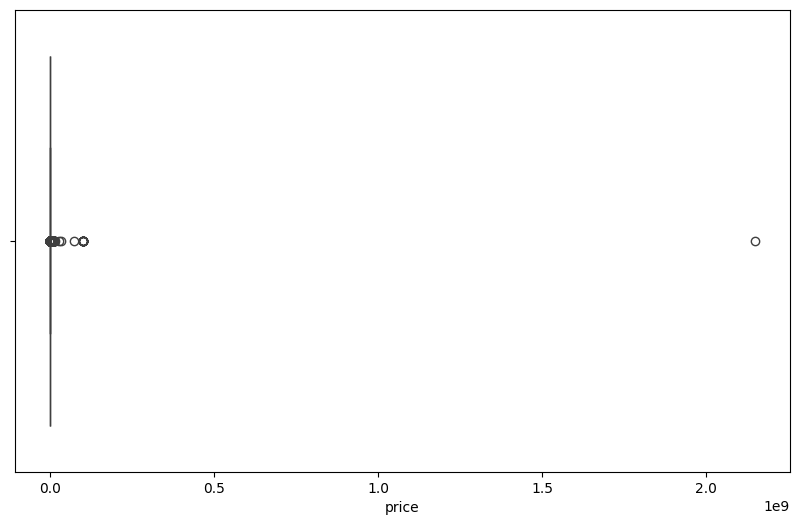

In [44]:
# Buat figure & axes
fig, ax = plt.subplots(figsize=(10, 6))

# Buat boxplot untuk kolom "price"
sns.boxplot(data=autos,
            x="price",
            ax=ax)

# Tampilkan plot
plt.show()

kita cek dulu statistik deskripsinya

In [45]:
# cek statistik deskriptif
autos.price.describe()

count    3.567760e+05
mean     1.742374e+04
std      3.657309e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.999000e+03
75%      7.400000e+03
max      2.147484e+09
Name: price, dtype: float64

 cek kemunculan harga paling tinggi pada kolom price

In [46]:
# cek harga paling tinggi
autos.price.value_counts().sort_index(ascending=False).head()

2147483647     1
99999999      14
99000000       1
74185296       1
32545461       1
Name: price, dtype: int64

hapus outlier harga yang memiliki nilai > 9999999 karena harga tersebut tidak menjadikan harga serius yang ditawarkan

In [47]:
# Menghapus baris yang memiliki nilai lebih dari 9999999 di kolom 'price'
autos = autos.loc[autos.price < 9999999]
# cek harga kembali
autos.price.value_counts().sort_index(ascending=False).head(2)

3895000    1
3890000    1
Name: price, dtype: int64

In [48]:
#cek harga yang memiliki nilai 0
autos.price.value_counts().sort_index(ascending=False).tail()

4        1
3        7
2       11
1     1119
0    10014
Name: price, dtype: int64

ternyata terdapat kemunculan harga 0 sebanyak 10014. kita cek dulu berapa presentasenya

In [52]:
# Hitung jumlah nilai 0 dalam kolom tertentu
jumlah_nilai_0 = (autos.price.values == 0).sum()

# Hitung jumlah total baris
jumlah_total_baris = autos.shape[0]

# Hitung persentase nilai 0
persentase_nilai_0 = (jumlah_nilai_0 / jumlah_total_baris) * 100

print(f"Persentase nilai 0 dalam kolom 'price': {persentase_nilai_0:.2f}%")

Persentase nilai 0 dalam kolom 'price': 2.81%


Ternyata nilai harga pada kolom price yang bernilai 0.0 berjumlah
2.81% dari total seluruh data. maka solusinya adalah dengan
menghapus semua data yang bernilai 0



In [53]:
# Menghapus baris yang memiliki nilai 0.0 di kolom 'price'
autos = autos[autos.price != 0.0]

#cek kembali data kolom price
autos.price.value_counts().sort_index(ascending=False).tail()

5      26
4       1
3       7
2      11
1    1119
Name: price, dtype: int64

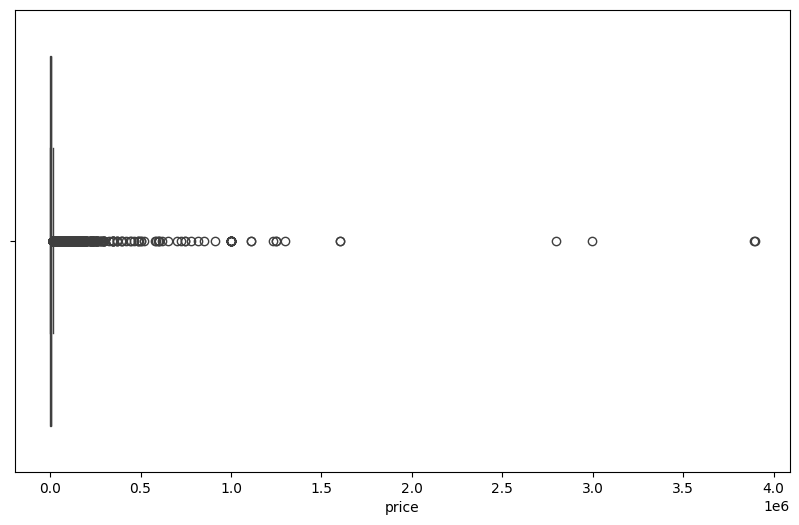

In [54]:
# Buat figure & axes
fig, ax = plt.subplots(figsize=(10, 6))

# Buat boxplot untuk kolom "price"
sns.boxplot(data=autos,
            x="price",
            ax=ax)

# Tampilkan plot
plt.show()

outlier setidaknya berkurang, namun kita harus menyelidiki lebih lanjut untuk menangani outlier

In [59]:
# cek statistik deskriptif kembali
autos.price.describe()

count    3.467160e+05
mean     6.158943e+03
std      1.828427e+04
min      1.000000e+00
25%      1.250000e+03
50%      3.150000e+03
75%      7.500000e+03
max      3.895000e+06
Name: price, dtype: float64

In [62]:
# Cari Q1 & Q3
Q1 = autos.price.quantile(0.25)
Q3 = autos.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 1250.00
Q3 : 7500.00


In [63]:
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 6250.00
Maximum Boundary : 16875.00


In [64]:
# Filter data tanpa outlier
autos = autos[autos["price"] < max_bound]

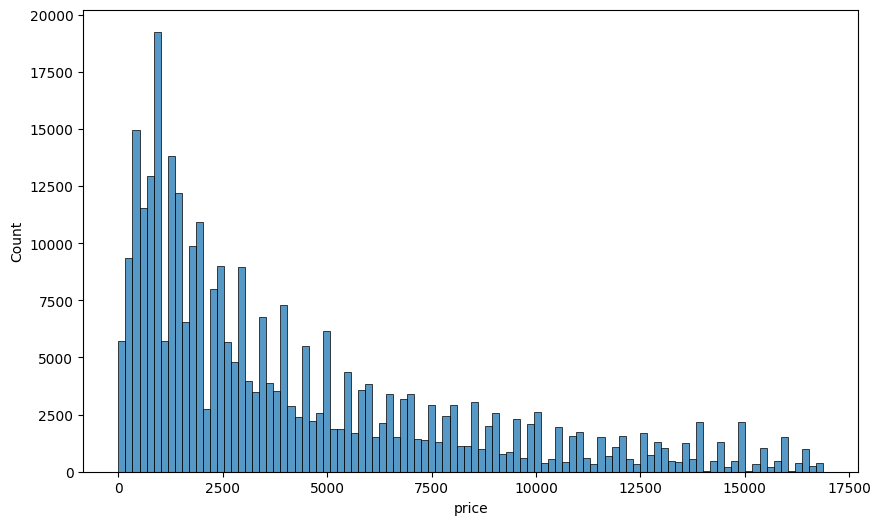

In [66]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = autos,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

In [67]:
# Validasi hasil filter
autos["price"].describe()

count    320760.000000
mean       4219.965482
std        3966.895356
min           1.000000
25%        1199.000000
50%        2800.000000
75%        6200.000000
max       16870.000000
Name: price, dtype: float64

Terlihat Q3 dan nilai maximum masih berbeda jauh
Outlier telah belum sepenuhnya dihilangkan.
kita coba sekali lagi

In [68]:
# Cari Q1 & Q3
Q1 = autos.price.quantile(0.25)
Q3 = autos.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 1199.00
Q3 : 6200.00


In [69]:
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 5001.00
Maximum Boundary : 13701.50


In [70]:
# Filter data tanpa outlier
autos = autos[autos["price"] < max_bound]

In [71]:
# Validasi hasil filter
autos["price"].describe()

count    307837.000000
mean       3762.720449
std        3342.770053
min           1.000000
25%        1100.000000
50%        2600.000000
75%        5600.000000
max       13700.000000
Name: price, dtype: float64

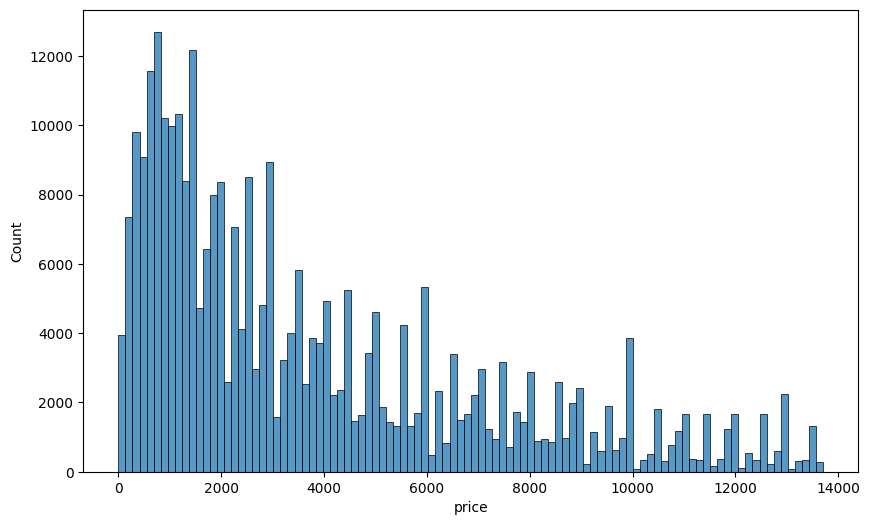

In [72]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = autos,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

ternyata distribusinya masih miring ke kanan kita coba melihat sebaran outlier dari 'price' berdasarkan 'vehicle_type'

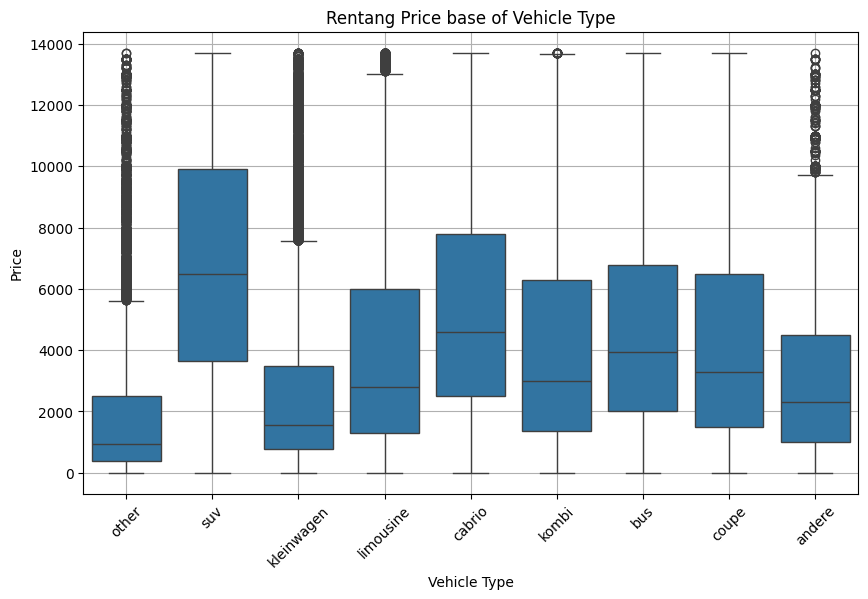

In [73]:
# Membuat boxplot
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.boxplot(x='vehicle_type', y='price', data=autos)
plt.title('Rentang Price base of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Memutar label sumbu x agar mudah dibaca
plt.grid(True)
plt.show()

ternyata terdapat outlier dari beberapa tipe mesin.
kita akan mengubah harga berdasarkan IQR, kita cari tahu dulu IQR dari masing-masing tipe

In [74]:
# Menghitung IQR, Q1, dan Q3 dari price digroup berdasarkan vehicle_type
result = autos.groupby('vehicle_type')['price'].describe(percentiles=[.25, .75])

# Menghitung IQR
result['IQR'] = result['75%'] - result['25%']

# Menampilkan hasil
result['IQR']

vehicle_type
andere        3500.00
bus           4790.00
cabrio        5300.00
coupe         5001.00
kleinwagen    2710.00
kombi         4920.00
limousine     4699.00
other         2099.00
suv           6250.75
Name: IQR, dtype: float64

In [75]:
# Menghapus outlier sesuai dengan data IQR
autos = autos[(autos.vehicle_type == 'andere') & (autos.price <= 3500) |
              (autos.vehicle_type == 'bus') & (autos.price <= 4790) |
              (autos.vehicle_type == 'cabrio') & (autos.price <= 5300) |
              (autos.vehicle_type == 'coupe') & (autos.price <= 5001) |
              (autos.vehicle_type == 'kleinwagen') & (autos.price <= 2710) |
              (autos.vehicle_type == 'kombi') & (autos.price <= 4920) |
              (autos.vehicle_type == 'limousine') & (autos.price <= 4699) |
              (autos.vehicle_type == 'other') & (autos.price <= 2099) |
              (autos.vehicle_type == 'suv') & (autos.price <= 6250)]

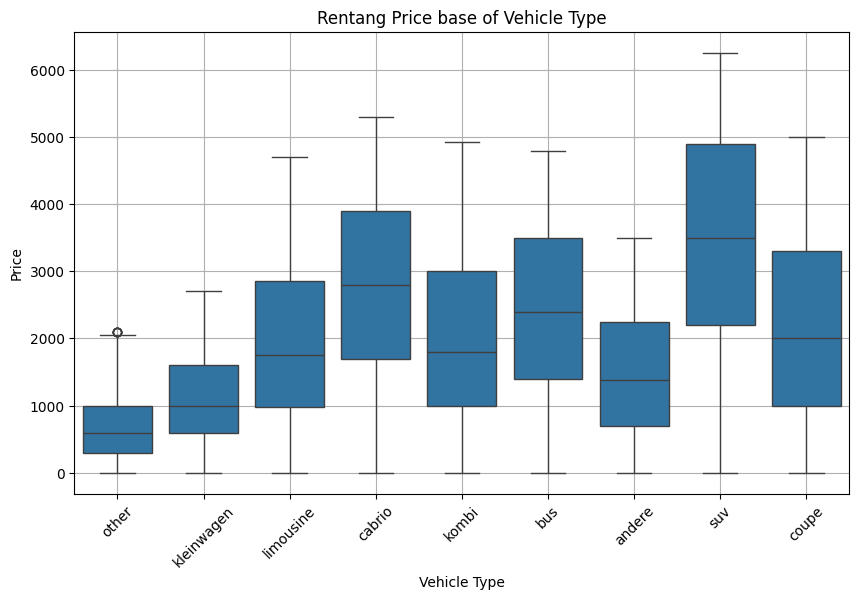

In [76]:
# Membuat boxplot
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.boxplot(x='vehicle_type', y='price', data=autos)
plt.title('Rentang Price base of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Memutar label sumbu x agar mudah dibaca
plt.grid(True)
plt.show()

kita cek kembali data price

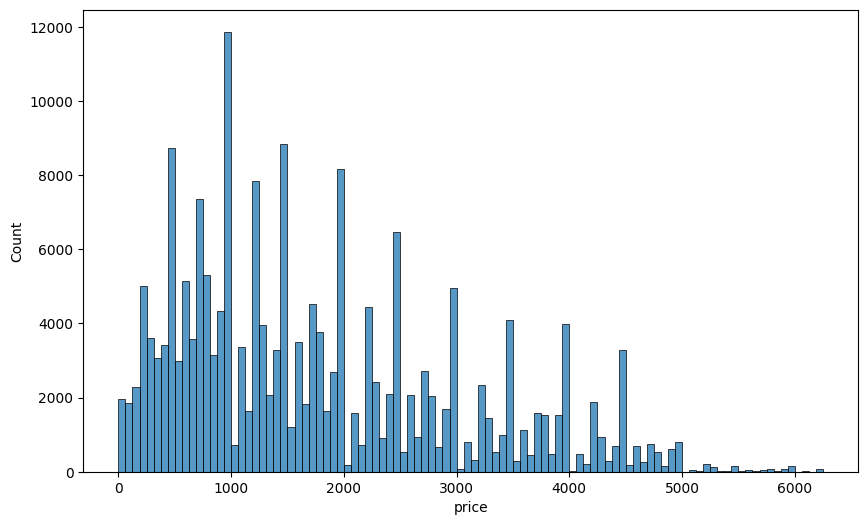

In [77]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = autos,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

In [79]:
autos.price.describe()

count    201751.000000
mean       1784.406357
std        1251.990960
min           1.000000
25%         799.000000
50%        1500.000000
75%        2500.000000
max        6250.000000
Name: price, dtype: float64

- Terlihat Q3 dan nilai maximum sudah tidak berbeda jauh
- Outlier telah dihilangkan

## Eksport Dataset

In [81]:
#eksport dataset yang telah dicleaning
autos.to_csv('autos_cleaned.csv', index=False)